In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate

In [6]:
def Nu(q_l, sigma_w, sigma_b):
    integral = integrate.quad(
        lambda z: 1/np.sqrt(2*np.pi) * np.exp(-np.square(z)/2) * np.square(phi(np.sqrt(q_l)*z)),
        -np.inf, np.inf)
    return np.square(sigma_w) * integral[0] + np.square(sigma_b)

In [19]:
sigma_w = 4
sigma_b = 0

N = [784, 64, 32, 10]

x_0 = np.random.normal(0, 1, size=(100, 784))

phi = lambda z: 1 / (1.0 + np.exp(-z))
phi = np.tanh

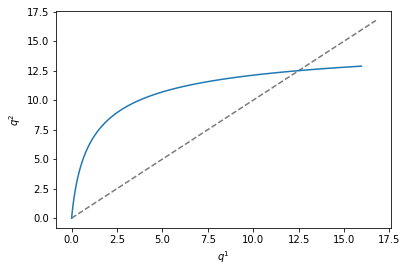

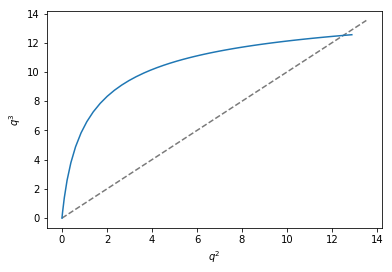

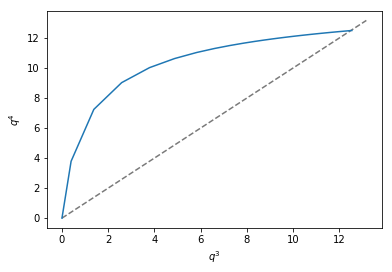

In [20]:
n_points = 100
n_layers = 5

input_length_range = np.linspace(0, 1, n_points)
q = np.zeros((n_layers, n_points))

for idx, point in enumerate(input_length_range):
    x_0 = np.random.normal(0, point, size=(100, 784))
    q[0, idx] = np.mean(np.sum(np.square(x_0), axis=-1)) / 784
    
    q[1, idx] = np.square(sigma_w) * q[0, idx] + np.square(sigma_b)
    
    for l in range(2, n_layers):
        q[l, idx] = Nu(q[l-1, idx], sigma_w, sigma_b)

for l in range(1, n_layers-1):
    fig, ax = plt.subplots()
    plt.plot(q[l], q[l+1])
    plt.xlabel(f"$q^{l}$")
    plt.ylabel(f"$q^{l+1}$")
    
    lims = [
        0,
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, ls="--", c=".3", alpha=0.75, zorder=0)
    plt.savefig("fig.jpg")